#Python MongoDB

Python can be used in database applications.

One of the most popular NoSQL database is MongoDB.

##1.1 Introduction


**MongoDB**

MongoDB stores data in JSON-like documents, which makes the database very flexible and scalable.

To be able to experiment with the code examples, you will need access to a MongoDB database.

You can download a free MongoDB database at https://www.mongodb.com.

Or get started right away with a MongoDB cloud service at https://www.mongodb.com/cloud/atlas.

**PyMongo**

Python needs a MongoDB driver to access the MongoDB database.
We will use the MongoDB driver "PyMongo".
We recommend that you use PIP to install "PyMongo".

**Test PyMongo**
To test if the installation was successful, or if you already have "pymongo" installed, create a Python page with the following content:


In [ ]:
import pymongo

If the above code was executed with no errors, "pymongo" is installed and ready to be used.

##1.2 Create Database

To create a database in MongoDB, start by creating a MongoClient object, then specify a connection URL with the correct ip address and the name of the database you want to create.

MongoDB will create the database if it does not exist, and make a connection to it.

Example
Create a database called "mydatabase":

```
import pymongo

myclient = pymongo.MongoClient("mongodb://localhost:27017/")

mydb = myclient["mydatabase"]
```

MongoDB waits until you have created a collection (table), with at least one document (record) before it actually creates the database (and collection).

You can check if a database exist by listing all databases in you system:

```
print(myclient.list_database_names())
```

Or you can check a specific database by name:

Example
Check if "mydatabase" exists:

```
dblist = myclient.list_database_names()
if "mydatabase" in dblist:
  print("The database exists.")
```


##1.3 Create Database

**Creating a Collection**

To create a collection in MongoDB, use database object and specify the name of the collection you want to create.

MongoDB will create the collection if it does not exist.

Example
Create a collection called "customers":

```
import pymongo

myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["mydatabase"]

mycol = mydb["customers"]
```

MongoDB waits until you have inserted a document before it actually creates the collection.

Check if Collection Exists

You can check if a collection exist in a database by listing all collections:

Example
Return a list of all collections in your database:

```
print(mydb.list_collection_names())
```

##1.4 Insert Document

**Insert Into Collection**

To insert a record, or document as it is called in MongoDB, into a collection, we use the insert_one() method.

The first parameter of the insert_one() method is a dictionary containing the name(s) and value(s) of each field in the document you want to insert.

Example
Insert a record in the "customers" collection:

```
import pymongo

myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["mydatabase"]
mycol = mydb["customers"]

mydict = { "name": "John", "address": "Highway 37" }

x = mycol.insert_one(mydict)
```
```
Result:

<pymongo.results.InsertOneResult object at 0x03D62918>
```


**Return the _id Field**

The insert_one() method returns a InsertOneResult object, which has a property, inserted_id, that holds the id of the inserted document.

Example
Insert another record in the "customers" collection, and return the value of the _id field:

```
mydict = { "name": "Peter", "address": "Lowstreet 27" }

x = mycol.insert_one(mydict)

print(x.inserted_id)
```

```
Result:

5b1910482ddb101b7042fcd7
```

If you do not specify an _id field, then MongoDB will add one for you and assign a unique id for each document.

In the example above no _id field was specified, so MongoDB assigned a unique _id for the record (document).

**Insert Multiple Documents**

To insert multiple documents into a collection in MongoDB, we use the insert_many() method.

The first parameter of the insert_many() method is a list containing dictionaries with the data you want to insert:

```
Example
import pymongo

myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["mydatabase"]
mycol = mydb["customers"]

mylist = [
  { "name": "Amy", "address": "Apple st 652"},
  { "name": "Hannah", "address": "Mountain 21"},
  { "name": "Michael", "address": "Valley 345"},
  { "name": "Sandy", "address": "Ocean blvd 2"},
  { "name": "Betty", "address": "Green Grass 1"},
  { "name": "Richard", "address": "Sky st 331"},
  { "name": "Susan", "address": "One way 98"},
  { "name": "Vicky", "address": "Yellow Garden 2"},
  { "name": "Ben", "address": "Park Lane 38"},
  { "name": "William", "address": "Central st 954"},
  { "name": "Chuck", "address": "Main Road 989"},
  { "name": "Viola", "address": "Sideway 1633"}
]

x = mycol.insert_many(mylist)

#print list of the _id values of the inserted documents:
print(x.inserted_ids)
```

```
Result:
[ObjectId('5b19112f2ddb101964065487'), ObjectId('5b19112f2ddb101964065488'), ObjectId('5b19112f2ddb101964065489'), ObjectId('5b19112f2ddb10196406548a'), ObjectId('5b19112f2ddb10196406548b'), ObjectId('5b19112f2ddb10196406548c'), ObjectId('5b19112f2ddb10196406548d'), ObjectId('5b19112f2ddb10196406548e'), ObjectId('5b19112f2ddb10196406548f'), ObjectId('5b19112f2ddb101964065490'), ObjectId('5b19112f2ddb101964065491'), ObjectId('5b19112f2ddb101964065492')]
```

The insert_many() method returns a InsertManyResult object, which has a property, inserted_ids, that holds the ids of the inserted documents.

**Insert Multiple Documents, with Specified IDs**

If you do not want MongoDB to assign unique ids for you document, you can specify the _id field when you insert the document(s).

Remember that the values has to be unique. Two documents cannot have the same _id.

Example

```
import pymongo

myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["mydatabase"]
mycol = mydb["customers"]

mylist = [
  { "_id": 1, "name": "John", "address": "Highway 37"},
  { "_id": 2, "name": "Peter", "address": "Lowstreet 27"},
  { "_id": 3, "name": "Amy", "address": "Apple st 652"},
  { "_id": 4, "name": "Hannah", "address": "Mountain 21"},
  { "_id": 5, "name": "Michael", "address": "Valley 345"},
  { "_id": 6, "name": "Sandy", "address": "Ocean blvd 2"},
  { "_id": 7, "name": "Betty", "address": "Green Grass 1"},
  { "_id": 8, "name": "Richard", "address": "Sky st 331"},
  { "_id": 9, "name": "Susan", "address": "One way 98"},
  { "_id": 10, "name": "Vicky", "address": "Yellow Garden 2"},
  { "_id": 11, "name": "Ben", "address": "Park Lane 38"},
  { "_id": 12, "name": "William", "address": "Central st 954"},
  { "_id": 13, "name": "Chuck", "address": "Main Road 989"},
  { "_id": 14, "name": "Viola", "address": "Sideway 1633"}
]

x = mycol.insert_many(mylist)

#print list of the _id values of the inserted documents:
print(x.inserted_ids)
```

```
Result:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
```

##1.5 Find



In MongoDB we use the find and findOne methods to find data in a collection.

Just like the SELECT statement is used to find data in a table in a MySQL database.

Example
Find the first document in the customers collection:

```
import pymongo

myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["mydatabase"]
mycol = mydb["customers"]

x = mycol.find_one()

print(x)
```

```
Result:
{'_id': 1, 'name': 'John', 'address': 'Highway37'}
```

**Find All**

To select data from a table in MongoDB, we can also use the find() method.

The find() method returns all occurrences in the selection.

The first parameter of the find() method is a query object. In this example we use an empty query object, which selects all documents in the collection.

**Note: No parameters in the find() method gives you the same result as SELECT * in MySQL.**


```
Example
Return all documents in the "customers" collection, and print each document:

import pymongo

myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["mydatabase"]
mycol = mydb["customers"]

for x in mycol.find():
  print(x)
```
```
Result:
{'_id': 1, 'name': 'John', 'address': 'Highway37'}
{'_id': 2, 'name': 'Peter', 'address': 'Lowstreet 27'}
{'_id': 3, 'name': 'Amy', 'address': 'Apple st 652'}
{'_id': 4, 'name': 'Hannah', 'address': 'Mountain 21'}
{'_id': 5, 'name': 'Michael', 'address': 'Valley 345'}
{'_id': 6, 'name': 'Sandy', 'address': 'Ocean blvd 2'}
{'_id': 7, 'name': 'Betty', 'address': 'Green Grass 1'}
{'_id': 8, 'name': 'Richard', 'address': 'Sky st 331'}
{'_id': 9, 'name': 'Susan', 'address': 'One way 98'}
{'_id': 10, 'name': 'Vicky', 'address': 'Yellow Garden 2'}
{'_id': 11, 'name': 'Ben', 'address': 'Park Lane 38'}
{'_id': 12, 'name': 'William', 'address': 'Central st 954'}
{'_id': 13, 'name': 'Chuck', 'address': 'Main Road 989'}
{'_id': 14, 'name': 'Viola', 'address': 'Sideway 1633'}
```

**Return Only Some Fields**

The second parameter of the find() method is an object describing which fields to include in the result.

This parameter is optional, and if omitted, all fields will be included in the result.

Example
Return only the names and addresses, not the _ids:

```
import pymongo

myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["mydatabase"]
mycol = mydb["customers"]

for x in mycol.find({},{ "_id": 0, "name": 1, "address": 1 }):
  print(x)
```
```
Result:
{'name': 'John', 'address': 'Highway37'}
{'name': 'Peter', 'address': 'Lowstreet 27'}
{'name': 'Amy', 'address': 'Apple st 652'}
{'name': 'Hannah', 'address': 'Mountain 21'}
{'name': 'Michael', 'address': 'Valley 345'}
{'name': 'Sandy', 'address': 'Ocean blvd 2'}
{'name': 'Betty', 'address': 'Green Grass 1'}
{'name': 'Richard', 'address': 'Sky st 331'}
{'name': 'Susan', 'address': 'One way 98'}
{'name': 'Vicky', 'address': 'Yellow Garden 2'}
{'name': 'Ben', 'address': 'Park Lane 38'}
{'name': 'William', 'address': 'Central st 954'}
{'name': 'Chuck', 'address': 'Main Road 989'}
{'name': 'Viola', 'address': 'Sideway 1633'}
```



Q1. Write a MongoDB query to display all the documents in the collection restaurants.

In [ ]:
#db.restaurants.find();

Q2. Write a MongoDB query to display the fields restaurant_id, name, borough and cuisine for all the documents in the collection restaurant.

In [ ]:
#db.restaurants.find({},{"restaurant_id" : 1,"name":1,"borough":1,"cuisine" :1});

Q3. Write a MongoDB query to display the fields restaurant_id, name, borough and cuisine, but exclude the field _id for all the documents in the collection restaurant.

In [ ]:
#db.restaurants.find({},{"restaurant_id" : 1,"name":1,"borough":1,"cuisine" :1,"_id":0});

Q4. Write a MongoDB query to display the fields restaurant_id, name, borough and zip code, but exclude the field _id for all the documents in the collection restaurant.

In [ ]:
#db.restaurants.find({},{"restaurant_id" : 1,"name":1,"borough":1,"address.zipcode" :1,"_id":0});

Q5. Write a MongoDB query to display all the restaurant which is in the borough Bronx.

In [ ]:
#db.restaurants.find({"borough": "Bronx"});

##1.6 Query

**Filter the Result**

When finding documents in a collection, you can filter the result by using a query object.

The first argument of the find() method is a query object, and is used to limit the search.

Example
Find document(s) with the address "Park Lane 38":

```
import pymongo

myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["mydatabase"]
mycol = mydb["customers"]

myquery = { "address": "Park Lane 38" }

mydoc = mycol.find(myquery)

for x in mydoc:
  print(x)
```
```
Result:
{'_id': 11, 'name': 'Ben', 'address': 'Park Lane 38'}
```

**Advanced Query**

To make advanced queries you can use modifiers as values in the query object.

E.g. to find the documents where the "address" field starts with the letter "S" or higher (alphabetically), use the greater than modifier: {"$gt": "S"}:

Example
Find documents where the address starts with the letter "S" or higher:

```
import pymongo

myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["mydatabase"]
mycol = mydb["customers"]

myquery = { "address": { "$gt": "S" } }

mydoc = mycol.find(myquery)

for x in mydoc:
  print(x)
```
```
Result:
{'_id': 5, 'name': 'Michael', 'address': 'Valley 345'}
{'_id': 8, 'name': 'Richard', 'address': 'Sky st 331'}
{'_id': 10, 'name': 'Vicky', 'address': 'Yellow Garden 2'}
{'_id': 14, 'name': 'Viola', 'address': 'Sideway 1633'}
```

Filter With Regular Expressions
You can also use regular expressions as a modifier.

Regular expressions can only be used to query strings.

To find only the documents where the "address" field starts with the letter "S", use the regular expression {"$regex": "^S"}:

Example
Find documents where the address starts with the letter "S":

```
import pymongo

myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["mydatabase"]
mycol = mydb["customers"]

myquery = { "address": { "$regex": "^S" } }

mydoc = mycol.find(myquery)

for x in mydoc:
  print(x)
```
```
Result:
{'_id': 10, 'name': 'Richard', 'address': 'Sky st 331'}
{'_id': 14, 'name': 'Viola', 'address': 'Sideway 1633'}
```


##1.7 Sort

**Sort the Result**

Use the sort() method to sort the result in ascending or descending order.

The sort() method takes one parameter for "fieldname" and one parameter for "direction" (ascending is the default direction).

Example
Sort the result alphabetically by name:

```
import pymongo

myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["mydatabase"]
mycol = mydb["customers"]

mydoc = mycol.find().sort("name")

for x in mydoc:
  print(x)
```

**Sort Descending**

Use the value -1 as the second parameter to sort descending.

sort("name", 1) #ascending
sort("name", -1) #descending

Example
Sort the result reverse alphabetically by name:

```
import pymongo

myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["mydatabase"]
mycol = mydb["customers"]

mydoc = mycol.find().sort("name", -1)

for x in mydoc:
  print(x)
```


##1.8 Delete Document

**Delete Document**

To delete one document, we use the delete_one() method.

The first parameter of the delete_one() method is a query object defining which document to delete.

Note: If the query finds more than one document, only the first occurrence is deleted.

Example
Delete the document with the address "Mountain 21":

```
import pymongo

myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["mydatabase"]
mycol = mydb["customers"]

myquery = { "address": "Mountain 21" }

mycol.delete_one(myquery)
```

```
Result:
{'_id': 1, 'name': 'John', 'address': 'Highway37'}
{'_id': 2, 'name': 'Peter', 'address': 'Lowstreet 27'}
{'_id': 3, 'name': 'Amy', 'address': 'Apple st 652'}
{'_id': 5, 'name': 'Michael', 'address': 'Valley 345'}
{'_id': 6, 'name': 'Sandy', 'address': 'Ocean blvd 2'}
{'_id': 7, 'name': 'Betty', 'address': 'Green Grass 1'}
{'_id': 8, 'name': 'Richard', 'address': 'Sky st 331'}
{'_id': 9, 'name': 'Susan', 'address': 'One way 98'}
{'_id': 10, 'name': 'Vicky', 'address': 'Yellow Garden 2'}
{'_id': 11, 'name': 'Ben', 'address': 'Park Lane 38'}
{'_id': 12, 'name': 'William', 'address': 'Central st 954'}
{'_id': 13, 'name': 'Chuck', 'address': 'Main Road 989'}
{'_id': 14, 'name': 'Viola', 'address': 'Sideway 1633'}
```


**Delete Many Documents**

To delete more than one document, use the delete_many() method.

The first parameter of the delete_many() method is a query object defining which documents to delete.

Example
Delete all documents were the address starts with the letter S:

```
import pymongo

myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["mydatabase"]
mycol = mydb["customers"]

myquery = { "address": {"$regex": "^S"} }

x = mycol.delete_many(myquery)

print(x.deleted_count, " documents deleted.")
```

```
Result:
2 documents deleted.
```

**Delete All Documents in a Collection**

To delete all documents in a collection, pass an empty query object to the delete_many() method:

Example
Delete all documents in the "customers" collection:

```
import pymongo

myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["mydatabase"]
mycol = mydb["customers"]

x = mycol.delete_many({})

print(x.deleted_count, " documents deleted.")
```

```
Result:
11 documents deleted.
```


##1.9 Drop Collection

**Delete Collection**

You can delete a table, or collection as it is called in MongoDB, by using the drop() method.

Example
Delete the "customers" collection:

```
import pymongo

myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["mydatabase"]
mycol = mydb["customers"]

mycol.drop()
```

The drop() method returns true if the collection was dropped successfully, and false if the collection does not exist.



##1.10 Update Collection

**Update Collection**

You can update a record, or document as it is called in MongoDB, by using the update_one() method.

The first parameter of the update_one() method is a query object defining which document to update.

Note: If the query finds more than one record, only the first occurrence is updated.

The second parameter is an object defining the new values of the document.

Example
Change the address from "Valley 345" to "Canyon 123":

```
import pymongo

myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["mydatabase"]
mycol = mydb["customers"]

myquery = { "address": "Valley 345" }
newvalues = { "$set": { "address": "Canyon 123" } }

mycol.update_one(myquery, newvalues)

#print "customers" after the update:
for x in mycol.find():
  print(x)
```

```
Result:
{'_id': 1, 'name': 'John', 'address': 'Highway37'}
{'_id': 2, 'name': 'Peter', 'address': 'Lowstreet 27'}
{'_id': 3, 'name': 'Amy', 'address': 'Apple st 652'}
{'_id': 4, 'name': 'Hannah', 'address': 'Mountain 21'}
{'_id': 5, 'name': 'Michael', 'address': 'Canyon 123'}
{'_id': 6, 'name': 'Sandy', 'address': 'Ocean blvd 2'}
{'_id': 7, 'name': 'Betty', 'address': 'Green Grass 1'}
{'_id': 8, 'name': 'Richard', 'address': 'Sky st 331'}
{'_id': 9, 'name': 'Susan', 'address': 'One way 98'}
{'_id': 10, 'name': 'Vicky', 'address': 'Yellow Garden 2'}
{'_id': 11, 'name': 'Ben', 'address': 'Park Lane 38'}
{'_id': 12, 'name': 'William', 'address': 'Central st 954'}
{'_id': 13, 'name': 'Chuck', 'address': 'Main Road 989'}
{'_id': 14, 'name': 'Viola', 'address': 'Sideway 1633'}
```

**Update Many**

To update all documents that meets the criteria of the query, use the update_many() method.

Example
Update all documents where the address starts with the letter "S":

```
import pymongo

myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["mydatabase"]
mycol = mydb["customers"]

myquery = { "address": { "$regex": "^S" } }
newvalues = { "$set": { "name": "Minnie" } }

x = mycol.update_many(myquery, newvalues)

print(x.modified_count, "documents updated.")
```
```
Result:
2 documents updated.
```


##1.11 Exercises

Structure of 'restaurants' collection:

```
{
  "address": {
     "building": "1007",
     "coord": [ -73.856077, 40.848447 ],
     "street": "Morris Park Ave",
     "zipcode": "10462"
  },
  "borough": "Bronx",
  "cuisine": "Bakery",
  "grades": [
     { "date": { "$date": 1393804800000 }, "grade": "A", "score": 2 },
     { "date": { "$date": 1378857600000 }, "grade": "A", "score": 6 },
     { "date": { "$date": 1358985600000 }, "grade": "A", "score": 10 },
     { "date": { "$date": 1322006400000 }, "grade": "A", "score": 9 },
     { "date": { "$date": 1299715200000 }, "grade": "B", "score": 14 }
  ],
  "name": "Morris Park Bake Shop",
  "restaurant_id": "30075445"
}
```

Q6. Write a MongoDB query to display the first 5 restaurant which is in the borough Bronx.

In [ ]:
#db.restaurants.find({"borough": "Bronx"}).limit(5);

Q7. Write a MongoDB query to display the next 5 restaurants after skipping first 5 which are in the borough Bronx.

In [ ]:
#db.restaurants.find({"borough": "Bronx"}).skip(5).limit(5);

Q8. Write a MongoDB query to find the restaurants who achieved a score more than 90.

In [ ]:
#db.restaurants.find({grades : { $elemMatch:{"score":{$gt : 90}}}});

Q9. Write a MongoDB query to find the restaurants that achieved a score, more than 80 but less than 100.

In [ ]:
#db.restaurants.find({grades : { $elemMatch:{"score":{$gt : 80 , $lt :100}}}});

Q10. Write a MongoDB query to find the restaurants which locate in latitude value less than -95.754168.

In [ ]:
#db.restaurants.find({"address.coord" : {$lt : -95.754168}});

Q11. Write a MongoDB query to find the restaurants that do not prepare any cuisine of 'American' and their grade score more than 70 and latitude less than -65.754168.

In [ ]:
'''
db.restaurants.find(
               {$and:
                    [
                       {"cuisine" : {$ne :"American "}},
                       {"grades.score" : {$gt : 70}},
                       {"address.coord" : {$lt : -65.754168}}
                    ]
                }
                    );
'''

Q12. Write a MongoDB query to find the restaurants which do not prepare any cuisine of 'American' and achieved a score more than 70 and located in the longitude less than -65.754168.
Note : Do this query without using $and operator.

In [ ]:
'''
db.restaurants.find(
                           {
                             "cuisine" : {$ne : "American "},
                             "grades.score" :{$gt: 70},
                             "address.coord" : {$lt : -65.754168}
                            }
                     );
'''

Q13. Write a MongoDB query to find the restaurants which do not prepare any cuisine of 'American ' and achieved a grade point 'A' not belongs to the borough Brooklyn. The document must be displayed according to the cuisine in descending order.

In [ ]:
'''
db.restaurants.find( {
                             "cuisine" : {$ne : "American "},
                             "grades.grade" :"A",
                             "borough": {$ne : "Brooklyn"}
                       } 
                    ).sort({"cuisine":-1});
'''

Q14. Write a MongoDB query to arrange the name of the restaurants in ascending order along with all the columns.

In [ ]:
#db.restaurants.find().sort({"name":1});

Q15. Write a MongoDB query to arrange the name of the restaurants in descending along with all the columns.

In [ ]:
'''
db.restaurants.find().sort(
                          {"name":-1}
                          );
'''

Q16. Write a MongoDB query to know whether all the addresses contains the street or not.

In [ ]:
'''
db.restaurants.find(
                     {"address.street" : 
                         { $exists : true } 
                     } 
                   );
'''

Q17. Write a MongoDB query to arranged the name of the cuisine in ascending order and for that same cuisine borough should be in descending order.

In [ ]:
'''
db.restaurants.find().sort(
                          {"name":-1}
                          );
'''

Q18. Write a MongoDB query which will select all documents in the restaurants collection where the coord field value is double.

In [ ]:
'''
db.restaurants.find(
                    {"address.coord" : 
                       {$type : 1}
                    }
                   );
'''

Q19. Write a MongoDB query to find the restaurant name, borough, longitude and attitude and cuisine for those restaurants which contains 'mon' as three letters somewhere in its name.

In [ ]:
'''
db.restaurants.find(
                   { name : 
                     { $regex : "mon.*", $options: "i" } 
                   },
                       {
                         "name":1,
                         "borough":1,
                         "address.coord":1,
                         "cuisine" :1
                        }
                   );
'''

Q20. Write a MongoDB query to find the restaurant name, borough, longitude and latitude and cuisine for those restaurants which contain 'Mad' as first three letters of its name.

In [ ]:
'''
db.restaurants.find(
                   { name : 
                     { $regex : /^Mad/i, } 
                   },
                       {
                         "name":1,
                         "borough":1,
                         "address.coord":1,
                         "cuisine" :1
                        }
                   );
'''

#Basic SQL

Python can be used in database applications.

One of the most popular databases is MySQL.

##2.1 Introduction

**MySQL Database**

To be able to experiment with the code examples, you should have MySQL installed on your computer.

You can download a free MySQL database at https://www.mysql.com/downloads/.

**Install MySQL Driver**

Python needs a MySQL driver to access the MySQL database.

In this tutorial we will use the driver "MySQL Connector".

We recommend that you use PIP to install "MySQL Connector".

**Test MySQL Connector**

To test if the installation was successful, or if you already have "MySQL Connector" installed, create a Python page with the following content:

In [ ]:
import mysql.connector

If the above code was executed with no errors, "MySQL Connector" is installed and ready to be used.

Create Connection
Start by creating a connection to the database.

Use the username and password from your MySQL database:

```
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="yourusername",
  password="yourpassword"
)

print(mydb)
```
```
Result:
<mysql.connector.connection.MySQLConnection object ar 0x016645F0>
```

Now you can start querying the database using SQL statements.

##2.2 Create Database

**Creating a Database**

To create a database in MySQL, use the "CREATE DATABASE" statement:

Example
create a database named "mydatabase":
```
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="yourusername",
  password="yourpassword"
)

mycursor = mydb.cursor()

mycursor.execute("CREATE DATABASE mydatabase")
```
If the above code was executed with no errors, you have successfully created a database.

**Check if Database Exists**

You can check if a database exist by listing all databases in your system by using the "SHOW DATABASES" statement:

Example
Return a list of your system's databases:
```
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="yourusername",
  password="yourpassword"
)

mycursor = mydb.cursor()

mycursor.execute("SHOW DATABASES")

for x in mycursor:
  print(x)
```
Or you can try to access the database when making the connection:

Example
Try connecting to the database "mydatabase":
```
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="yourusername",
  password="yourpassword",
  database="mydatabase"
)
```
If the database does not exist, you will get an error.

##2.3 Create Table

**Creating a Table**

To create a table in MySQL, use the "CREATE TABLE" statement.

Make sure you define the name of the database when you create the connection

Example
Create a table named "customers":

```
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="yourusername",
  password="yourpassword",
  database="mydatabase"
)

mycursor = mydb.cursor()

mycursor.execute("CREATE TABLE customers (name VARCHAR(255), address VARCHAR(255))")
```
If the above code was executed with no errors, you have now successfully created a table.

Check if Table Exists
You can check if a table exist by listing all tables in your database with the "SHOW TABLES" statement:

Example
Return a list of your system's databases:

```
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="yourusername",
  password="yourpassword",
  database="mydatabase"
)

mycursor = mydb.cursor()

mycursor.execute("SHOW TABLES")

for x in mycursor:
  print(x)
```
```
Result:
('customers',)
```

**Primary Key**
When creating a table, you should also create a column with a unique key for each record.

This can be done by defining a PRIMARY KEY.

We use the statement "INT AUTO_INCREMENT PRIMARY KEY" which will insert a unique number for each record. Starting at 1, and increased by one for each record.

Example
Create primary key when creating the table:

```
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="yourusername",
  password="yourpassword",
  database="mydatabase"
)

mycursor = mydb.cursor()

mycursor.execute("CREATE TABLE customers (id INT AUTO_INCREMENT PRIMARY KEY, name VARCHAR(255), address VARCHAR(255))")
```
If the table already exists, use the ALTER TABLE keyword:

Example
Create primary key on an existing table:

```
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="yourusername",
  password="yourpassword",
  database="mydatabase"
)

mycursor = mydb.cursor()

mycursor.execute("ALTER TABLE customers ADD COLUMN id INT AUTO_INCREMENT PRIMARY KEY")
```


##2.4 Insert

**Insert Into Table**

To fill a table in MySQL, use the "INSERT INTO" statement.

Example
Insert a record in the "customers" table:

```
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="yourusername",
  password="yourpassword",
  database="mydatabase"
)

mycursor = mydb.cursor()

sql = "INSERT INTO customers (name, address) VALUES (%s, %s)"
val = ("John", "Highway 21")
mycursor.execute(sql, val)

mydb.commit()

print(mycursor.rowcount, "record inserted.")
```
```
Result:
1 record inserted.
```

**Important!: Notice the statement: mydb.commit(). It is required to make the changes, otherwise no changes are made to the table.**

**Insert Multiple Rows**

To insert multiple rows into a table, use the executemany() method.

The second parameter of the executemany() method is a list of tuples, containing the data you want to insert:

Example
Fill the "customers" table with data:

```
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="yourusername",
  password="yourpassword",
  database="mydatabase"
)

mycursor = mydb.cursor()

sql = "INSERT INTO customers (name, address) VALUES (%s, %s)"
val = [
  ('Peter', 'Lowstreet 4'),
  ('Amy', 'Apple st 652'),
  ('Hannah', 'Mountain 21'),
  ('Michael', 'Valley 345'),
  ('Sandy', 'Ocean blvd 2'),
  ('Betty', 'Green Grass 1'),
  ('Richard', 'Sky st 331'),
  ('Susan', 'One way 98'),
  ('Vicky', 'Yellow Garden 2'),
  ('Ben', 'Park Lane 38'),
  ('William', 'Central st 954'),
  ('Chuck', 'Main Road 989'),
  ('Viola', 'Sideway 1633')
]

mycursor.executemany(sql, val)

mydb.commit()

print(mycursor.rowcount, "was inserted.")

```
```
Result:
13 record was inserted.
```

**Get Inserted ID**

You can get the id of the row you just inserted by asking the cursor object.

Note: If you insert more than one row, the id of the last inserted row is returned.

Example
Insert one row, and return the ID:

```
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="yourusername",
  password="yourpassword",
  database="mydatabase"
)

mycursor = mydb.cursor()

sql = "INSERT INTO customers (name, address) VALUES (%s, %s)"
val = ("Michelle", "Blue Village")
mycursor.execute(sql, val)

mydb.commit()

print("1 record inserted, ID:", mycursor.lastrowid)
```
```
Result:
1 record inserted, ID: 15
```



##2.5 Select Statements

**Select From a Table**

To select from a table in MySQL, use the "SELECT" statement:

Example
Select all records from the "customers" table, and display the result:

```
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="yourusername",
  password="yourpassword",
  database="mydatabase"
)

mycursor = mydb.cursor()

mycursor.execute("SELECT * FROM customers")

myresult = mycursor.fetchall()

for x in myresult:
  print(x)
```
```
Result:
(1, 'John', 'Highway 21')
(2, 'Peter', 'Lowstreet 27')
(3, 'Amy', 'Apple st 652')
(4, 'Hannah', 'Mountain 21')
(5, 'Michael', 'Valley 345')
(6, 'Sandy', 'Ocean blvd 2')
(7, 'Betty', 'Green Grass 1')
(8, 'Richard', 'Sky st 331')
(9, 'Susan', 'One way 98')
(10, 'Vicky', 'Yellow Garden 2')
(11, 'Ben', 'Park Lane 38')
(12, 'William', 'Central st 954')
(13, 'Chuck', 'Main Road 989')
(14, 'Viola', 'Sideway 1633')
(15, 'Michelle', 'Blue Village')
```

Note: We use the fetchall() method, which fetches all rows from the last executed statement.

**Selecting Columns**

To select only some of the columns in a table, use the "SELECT" statement followed by the column name(s):

Example
Select only the name and address columns:

```
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="yourusername",
  password="yourpassword",
  database="mydatabase"
)

mycursor = mydb.cursor()

mycursor.execute("SELECT name, address FROM customers")

myresult = mycursor.fetchall()

for x in myresult:
  print(x)
```
```
Result:
('John', 'Highway 21')
('Peter', 'Lowstreet 27')
('Amy', 'Apple st 652')
('Hannah', 'Mountain 21')
('Michael', 'Valley 345')
('Sandy', 'Ocean blvd 2')
('Betty', 'Green Grass 1')
('Richard', 'Sky st 331')
('Susan', 'One way 98')
('Vicky', 'Yellow Garden 2')
('Ben', 'Park Lane 38')
('William', 'Central st 954')
('Chuck', 'Main Road 989')
('Viola', 'Sideway 1633')
('Michelle', 'Blue Village')
```

**Using the fetchone() Method**

If you are only interested in one row, you can use the fetchone() method.

The fetchone() method will return the first row of the result:

Example
Fetch only one row:

```
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="yourusername",
  password="yourpassword",
  database="mydatabase"
)

mycursor = mydb.cursor()

mycursor.execute("SELECT * FROM customers")

myresult = mycursor.fetchone()

print(myresult)
```
```
Result:
(1, 'John', 'Highway 21')
```

##2.6 Where Clause

**Select With a Filter**

When selecting records from a table, you can filter the selection by using the "WHERE" statement:

Example
Select record(s) where the address is "Park Lane 38": result:

```
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="yourusername",
  password="yourpassword",
  database="mydatabase"
)

mycursor = mydb.cursor()

sql = "SELECT * FROM customers WHERE address ='Park Lane 38'"

mycursor.execute(sql)

myresult = mycursor.fetchall()

for x in myresult:
  print(x)
```

```
Result:
(11, 'Ben', 'Park Lane 38')
```

**Wildcard Characters**

You can also select the records that starts, includes, or ends with a given letter or phrase.

Use the %  to represent wildcard characters:

Example
Select records where the address contains the word "way":

```
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="yourusername",
  password="yourpassword",
  database="mydatabase"
)

mycursor = mydb.cursor()

sql = "SELECT * FROM customers WHERE address LIKE '%way%'"

mycursor.execute(sql)

myresult = mycursor.fetchall()

for x in myresult:
  print(x)
```
```
Result:
(1, 'John', 'Highway 21')
(9, 'Susan', 'One way 98')
(14, 'Viola', 'Sideway 1633')
```

**Prevent SQL Injection**

When query values are provided by the user, you should escape the values.

This is to prevent SQL injections, which is a common web hacking technique to destroy or misuse your database.

The mysql.connector module has methods to escape query values:

Example
Escape query values by using the placholder %s method:

```
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="yourusername",
  password="yourpassword",
  database="mydatabase"
)

mycursor = mydb.cursor()

sql = "SELECT * FROM customers WHERE address = %s"
adr = ("Yellow Garden 2", )

mycursor.execute(sql, adr)

myresult = mycursor.fetchall()

for x in myresult:
  print(x)
```
```
Result:
(10, 'Vicky', 'Yellow Garden 2')
```


##2.7 Order By Clause

**Sort the Result**

Use the ORDER BY statement to sort the result in ascending or descending order.

The ORDER BY keyword sorts the result ascending by default. To sort the result in descending order, use the DESC keyword.

Example
Sort the result alphabetically by name: result:

```
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="yourusername",
  password="yourpassword",
  database="mydatabase"
)

mycursor = mydb.cursor()

sql = "SELECT * FROM customers ORDER BY name"

mycursor.execute(sql)

myresult = mycursor.fetchall()

for x in myresult:
  print(x)

```
```
Result:
(3, 'Amy', 'Apple st 652')
(11, 'Ben', 'Park Lane 38')
(7, 'Betty', 'Green Grass 1')
(13, 'Chuck', 'Main Road 989')
(4, 'Hannah', 'Mountain 21')
(1, 'John', 'Highway 21')
(5, 'Michael', 'Valley 345')
(15, 'Michelle', 'Blue Village') (2, 'Peter', 'Lowstreet 27')
(8, 'Richard', 'Sky st 331')
(6, 'Sandy', 'Ocean blvd 2')
(9, 'Susan', 'One way 98')
(10, 'Vicky', 'Yellow Garden 2')
(14, 'Viola', 'Sideway 1633')
(12, 'William', 'Central st 954')
```

**ORDER BY DESC**

Use the DESC keyword to sort the result in a descending order.

Example
Sort the result reverse alphabetically by name:

```
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="yourusername",
  password="yourpassword",
  database="mydatabase"
)

mycursor = mydb.cursor()

sql = "SELECT * FROM customers ORDER BY name DESC"

mycursor.execute(sql)

myresult = mycursor.fetchall()

for x in myresult:
  print(x)
```
```
Result:
(12, 'William', 'Central st 954') (14, 'Viola', 'Sideway 1633')
(10, 'Vicky', 'Yellow Garden 2')
(9, 'Susan', 'One way 98')
(6, 'Sandy', 'Ocean blvd 2')
(8, 'Richard', 'Sky st 331')
(2, 'Peter', 'Lowstreet 27')
(15, 'Michelle', 'Blue Village') (5, 'Michael', 'Valley 345')
(1, 'John', 'Highway 21')
(4, 'Hannah', 'Mountain 21')
(13, 'Chuck', 'Main Road 989')
(7, 'Betty', 'Green Grass 1')
(11, 'Ben', 'Park Lane 38')
(3, 'Amy', 'Apple st 652')
```

##2.8 Delete Records

**Delete Record**

You can delete records from an existing table by using the "DELETE FROM" statement:

Example
Delete any record where the address is "Mountain 21":

```
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="yourusername",
  password="yourpassword",
  database="mydatabase"
)

mycursor = mydb.cursor()

sql = "DELETE FROM customers WHERE address = 'Mountain 21'"

mycursor.execute(sql)

mydb.commit()

print(mycursor.rowcount, "record(s) deleted")
```
```
Result:
1 record(s) deleted
```

**Important!: Notice the statement: mydb.commit(). It is required to make the changes, otherwise no changes are made to the table.**

Notice the WHERE clause in the DELETE syntax: The WHERE clause specifies which record(s) that should be deleted. If you omit the WHERE clause, all records will be deleted!


**Prevent SQL Injection**

It is considered a good practice to escape the values of any query, also in delete statements.

This is to prevent SQL injections, which is a common web hacking technique to destroy or misuse your database.

The mysql.connector module uses the placeholder %s to escape values in the delete statement:

Example
Escape values by using the placeholder %s method:

```
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="yourusername",
  password="yourpassword",
  database="mydatabase"
)

mycursor = mydb.cursor()

sql = "DELETE FROM customers WHERE address = %s"
adr = ("Yellow Garden 2", )

mycursor.execute(sql, adr)

mydb.commit()

print(mycursor.rowcount, "record(s) deleted")
```
```
Result:
1 record(s) deleted
```


##2.9 Drop Table

**Delete a Table**

You can delete an existing table by using the "DROP TABLE" statement:

Example
Delete the table "customers":

```
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="yourusername",
  password="yourpassword",
  database="mydatabase"
)

mycursor = mydb.cursor()

sql = "DROP TABLE customers"

mycursor.execute(sql)

```
```
#If this page was executed with no error(s), you have successfully deleted the "customers" table.
```

**Drop Only if Exist**

If the the table you want to delete is already deleted, or for any other reason does not exist, you can use the IF EXISTS keyword to avoid getting an error.

Example
Delete the table "customers" if it exists:

```
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="yourusername",
  password="yourpassword",
  database="mydatabase"
)

mycursor = mydb.cursor()

sql = "DROP TABLE IF EXISTS customers"

mycursor.execute(sql)
```
```
#If this page was executed with no error(s), you have successfully deleted the "customers" table.
```


##2.10 Update Table

**Update Table**

You can update existing records in a table by using the "UPDATE" statement:

Example
Overwrite the address column from "Valley 345" to "Canyon 123":

```
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="yourusername",
  password="yourpassword",
  database="mydatabase"
)

mycursor = mydb.cursor()

sql = "UPDATE customers SET address = 'Canyon 123' WHERE address = 'Valley 345'"

mycursor.execute(sql)

mydb.commit()

print(mycursor.rowcount, "record(s) affected")
```
```
Result:
1 record(s) affected
```

Important!: Notice the statement: mydb.commit(). It is required to make the changes, otherwise no changes are made to the table.

Notice the WHERE clause in the UPDATE syntax: The WHERE clause specifies which record or records that should be updated. If you omit the WHERE clause, all records will be updated!

**Prevent SQL Injection**

It is considered a good practice to escape the values of any query, also in update statements.

This is to prevent SQL injections, which is a common web hacking technique to destroy or misuse your database.

The mysql.connector module uses the placeholder %s to escape values in the delete statement:

Example
Escape values by using the placeholder %s method:

```
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="yourusername",
  password="yourpassword",
  database="mydatabase"
)

mycursor = mydb.cursor()

sql = "UPDATE customers SET address = %s WHERE address = %s"
val = ("Valley 345", "Canyon 123")

mycursor.execute(sql, val)

mydb.commit()

print(mycursor.rowcount, "record(s) affected")
```
```
Result:
1 record(s) affected
```


##2.11 Limit

**Limit the Result**

You can limit the number of records returned from the query, by using the "LIMIT" statement:

Example
Select the 5 first records in the "customers" table:

```
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="yourusername",
  password="yourpassword",
  database="mydatabase"
)

mycursor = mydb.cursor()

mycursor.execute("SELECT * FROM customers LIMIT 5")

myresult = mycursor.fetchall()

for x in myresult:
  print(x)
```
```
(1, 'John', 'Highway 21')
(2, 'Peter', 'Lowstreet 27')
(3, 'Amy', 'Apple st 652')
(4, 'Hannah', 'Mountain 21')
(5, 'Michael', 'Valley 345')
```

**Start From Another Position**

If you want to return five records, starting from the third record, you can use the "OFFSET" keyword:

Example
Start from position 3, and return 5 records:

```
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="yourusername",
  password="yourpassword",
  database="mydatabase"
)

mycursor = mydb.cursor()

mycursor.execute("SELECT * FROM customers LIMIT 5 OFFSET 2")

myresult = mycursor.fetchall()

for x in myresult:
  print(x)
```
```
Result:
(3, 'Amy', 'Apple st 652')
(4, 'Hannah', 'Mountain 21')
(5, 'Michael', 'Valley 345')
(6, 'Sandy', 'Ocean blvd 2')
(7, 'Betty', 'Green Grass 1')
```


##2.11 Join

**Join Two or More Tables**

You can combine rows from two or more tables, based on a related column between them, by using a JOIN statement.

Consider you have a "users" table and a "products" table:
```
users
{ id: 1, name: 'John', fav: 154},
{ id: 2, name: 'Peter', fav: 154},
{ id: 3, name: 'Amy', fav: 155},
{ id: 4, name: 'Hannah', fav:},
{ id: 5, name: 'Michael', fav:}
products
{ id: 154, name: 'Chocolate Heaven' },
{ id: 155, name: 'Tasty Lemons' },
{ id: 156, name: 'Vanilla Dreams' }
```
These two tables can be combined by using users' fav field and products' id field.

Example
Join users and products to see the name of the users favorite product:

```
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="yourusername",
  password="yourpassword",
  database="mydatabase"
)

mycursor = mydb.cursor()

sql = "SELECT \
  users.name AS user, \
  products.name AS favorite \
  FROM users \
  INNER JOIN products ON users.fav = products.id"

mycursor.execute(sql)

myresult = mycursor.fetchall()

for x in myresult:
  print(x)
```
```
Result:
('John', 'Chocolate Heaven')
('Peter', 'Chocolate Heaven')
('Amy', 'Tasty Lemon')
```

Note: You can use JOIN instead of INNER JOIN. They will both give you the same result.

**LEFT JOIN**

In the example above, Hannah, and Michael were excluded from the result, that is because INNER JOIN only shows the records where there is a match.

If you want to show all users, even if they do not have a favorite product, use the LEFT JOIN statement:

Example
Select all users and their favorite product:

```
sql = "SELECT \
  users.name AS user, \
  products.name AS favorite \
  FROM users \
  LEFT JOIN products ON users.fav = products.id"
```
```
Result:
('John', 'Chocolate Heaven')
('Peter', 'Chocolate Heaven')
('Amy', 'Tasty Lemon')
('Hannah', None)
('Michael', None)
```

**RIGHT JOIN**

If you want to return all products, and the users who have them as their favorite, even if no user have them as their favorite, use the RIGHT JOIN statement:

Example
Select all products, and the user(s) who have them as their favorite:

```
sql = "SELECT \
  users.name AS user, \
  products.name AS favorite \
  FROM users \
  RIGHT JOIN products ON users.fav = products.id"
```

```
Result:
('John', 'Chocolate Heaven')
('Peter', 'Chocolate Heaven')
('Amy', 'Tasty Lemon')
('Hannah', None)
('Michael', None)
```

Note: Hannah and Michael, who have no favorite product, are not included in the result.



##2.12 Exercises

**Movie Database**


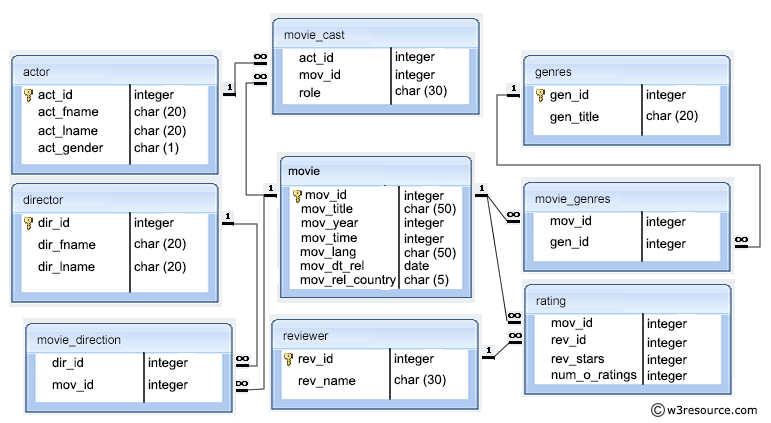

**Sample table: movie**

```
mov_id |                     mov_title                      | mov_year | mov_time |    mov_lang     | mov_dt_rel | mov_rel_country
--------+----------------------------------------------------+----------+----------+-----------------+------------+-----------------
    901 | Vertigo                                            |     1958 |      128 | English         | 1958-08-24 | UK
    902 | The Innocents                                      |     1961 |      100 | English         | 1962-02-19 | SW
    903 | Lawrence of Arabia                                 |     1962 |      216 | English         | 1962-12-11 | UK
    904 | The Deer Hunter                                    |     1978 |      183 | English         | 1979-03-08 | UK
    905 | Amadeus                                            |     1984 |      160 | English         | 1985-01-07 | UK
    906 | Blade Runner                                       |     1982 |      117 | English         | 1982-09-09 | UK
    907 | Eyes Wide Shut                                     |     1999 |      159 | English         |            | UK
    908 | The Usual Suspects                                 |     1995 |      106 | English         | 1995-08-25 | UK
    909 | Chinatown                                          |     1974 |      130 | English         | 1974-08-09 | UK
    910 | Boogie Nights                                      |     1997 |      155 | English         | 1998-02-16 | UK
    911 | Annie Hall                                         |     1977 |       93 | English         | 1977-04-20 | USA
    912 | Princess Mononoke                                  |     1997 |      134 | Japanese        | 2001-10-19 | UK
    913 | The Shawshank Redemption                           |     1994 |      142 | English         | 1995-02-17 | UK
    914 | American Beauty                                    |     1999 |      122 | English         |            | UK
    915 | Titanic                                            |     1997 |      194 | English         | 1998-01-23 | UK
    916 | Good Will Hunting                                  |     1997 |      126 | English         | 1998-06-03 | UK
    917 | Deliverance                                        |     1972 |      109 | English         | 1982-10-05 | UK
    918 | Trainspotting                                      |     1996 |       94 | English         | 1996-02-23 | UK
    919 | The Prestige                                       |     2006 |      130 | English         | 2006-11-10 | UK
    920 | Donnie Darko                                       |     2001 |      113 | English         |            | UK
    921 | Slumdog Millionaire                                |     2008 |      120 | English         | 2009-01-09 | UK
    922 | Aliens                                             |     1986 |      137 | English         | 1986-08-29 | UK
    923 | Beyond the Sea                                     |     2004 |      118 | English         | 2004-11-26 | UK
    924 | Avatar                                             |     2009 |      162 | English         | 2009-12-17 | UK
    926 | Seven Samurai                                      |     1954 |      207 | Japanese        | 1954-04-26 | JP
    927 | Spirited Away                                      |     2001 |      125 | Japanese        | 2003-09-12 | UK
    928 | Back to the Future                                 |     1985 |      116 | English         | 1985-12-04 | UK
    925 | Braveheart                                         |     1995 |      178 | English  
```

**Sample table: reviewer**

```
 rev_id |            rev_name
--------+--------------------------------
   9001 | Righty Sock
   9002 | Jack Malvern
   9003 | Flagrant Baronessa
   9004 | Alec Shaw
   9005 |
   9006 | Victor Woeltjen
   9007 | Simon Wright
   9008 | Neal Wruck
   9009 | Paul Monks
   9010 | Mike Salvati
   9011 |
   9012 | Wesley S. Walker
   9013 | Sasha Goldshtein
   9014 | Josh Cates
   9015 | Krug Stillo
   9016 | Scott LeBrun
   9017 | Hannah Steele
   9018 | Vincent Cadena
   9019 | Brandt Sponseller
   9020 | Richard Adams
```

**Sample table: rating**

 mov_id | rev_id | rev_stars | num_o_ratings
--------+--------+-----------+---------------
    901 |   9001 |      8.40 |        263575
    902 |   9002 |      7.90 |         20207
    903 |   9003 |      8.30 |        202778
    906 |   9005 |      8.20 |        484746
    924 |   9006 |      7.30 |
    908 |   9007 |      8.60 |        779489
    909 |   9008 |           |        227235
    910 |   9009 |      3.00 |        195961
    911 |   9010 |      8.10 |        203875
    912 |   9011 |      8.40 |
    914 |   9013 |      7.00 |        862618
    915 |   9001 |      7.70 |        830095
    916 |   9014 |      4.00 |        642132
    925 |   9015 |      7.70 |         81328
    918 |   9016 |           |        580301
    920 |   9017 |      8.10 |        609451
    921 |   9018 |      8.00 |        667758
    922 |   9019 |      8.40 |        511613
    923 |   9020 |      6.70 |         13091

**Sample table: actor**

```
 act_id |      act_fname       |      act_lname       | act_gender
--------+----------------------+----------------------+------------
    101 | James                | Stewart              | M
    102 | Deborah              | Kerr                 | F
    103 | Peter                | OToole               | M
    104 | Robert               | De Niro              | M
    105 | F. Murray            | Abraham              | M
    106 | Harrison             | Ford                 | M
    107 | Nicole               | Kidman               | F
    108 | Stephen              | Baldwin              | M
    109 | Jack                 | Nicholson            | M
    110 | Mark                 | Wahlberg             | M
    111 | Woody                | Allen                | M
    112 | Claire               | Danes                | F
    113 | Tim                  | Robbins              | M
    114 | Kevin                | Spacey               | M
    115 | Kate                 | Winslet              | F
    116 | Robin                | Williams             | M
    117 | Jon                  | Voight               | M
    118 | Ewan                 | McGregor             | M
    119 | Christian            | Bale                 | M
    120 | Maggie               | Gyllenhaal           | F
    121 | Dev                  | Patel                | M
    122 | Sigourney            | Weaver               | F
    123 | David                | Aston                | M
    124 | Ali                  | Astin                | F
```

**Sample table: movie_cast**

```
 act_id | mov_id |              role
--------+--------+--------------------------------
    101 |    901 | John Scottie Ferguson
    102 |    902 | Miss Giddens
    103 |    903 | T.E. Lawrence
    104 |    904 | Michael
    105 |    905 | Antonio Salieri
    106 |    906 | Rick Deckard
    107 |    907 | Alice Harford
    108 |    908 | McManus
    110 |    910 | Eddie Adams
    111 |    911 | Alvy Singer
    112 |    912 | San
    113 |    913 | Andy Dufresne
    114 |    914 | Lester Burnham
    115 |    915 | Rose DeWitt Bukater
    116 |    916 | Sean Maguire
    117 |    917 | Ed
    118 |    918 | Renton
    120 |    920 | Elizabeth Darko
    121 |    921 | Older Jamal
    122 |    922 | Ripley
    114 |    923 | Bobby Darin
    109 |    909 | J.J. Gittes
    119 |    919 | Alfred Borden
```

**Sample table: director**

```
 dir_id |      dir_fname       |      dir_lname
--------+----------------------+----------------------
    201 | Alfred               | Hitchcock
    202 | Jack                 | Clayton
    203 | David                | Lean
    204 | Michael              | Cimino
    205 | Milos                | Forman
    206 | Ridley               | Scott
    207 | Stanley              | Kubrick
    208 | Bryan                | Singer
    209 | Roman                | Polanski
    210 | Paul                 | Thomas Anderson
    211 | Woody                | Allen
    212 | Hayao                | Miyazaki
    213 | Frank                | Darabont
    214 | Sam                  | Mendes
    215 | James                | Cameron
    216 | Gus                  | Van Sant
    217 | John                 | Boorman
    218 | Danny                | Boyle
    219 | Christopher          | Nolan
    220 | Richard              | Kelly
    221 | Kevin                | Spacey
    222 | Andrei               | Tarkovsky
    223 | Peter                | Jackson
```

**Sample table: movie_direction**


```
Sample table: movie_direction
 dir_id | mov_id
--------+--------
    201 |    901
    202 |    902
    203 |    903
    204 |    904
    205 |    905
    206 |    906
    207 |    907
    208 |    908
    209 |    909
    210 |    910
    211 |    911
    212 |    912
    213 |    913
    214 |    914
    215 |    915
    216 |    916
    217 |    917
    218 |    918
    219 |    919
    220 |    920
    218 |    921
    215 |    922
    221 |    923
```
